In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df = pd.read_csv('smoking.csv')
df.head(10)


,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
5,6,Female,37,Married,GCSE/O Level,British,White,"15,600 to 20,800",The North,No,NaN,NaN,NaN
6,7,Male,53,Married,Degree,British,White,"Above 36,400",The North,Yes,6.0,6.0,Packets
7,8,Male,44,Single,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
8,9,Male,40,Single,GCSE/CSE,English,White,"2,600 to 5,200",The North,Yes,8.0,8.0,Hand-Rolled
9,10,Female,41,Married,No Qualification,English,White,"5,200 to 10,400",The North,Yes,15.0,12.0,Packets


In [135]:
df=df.copy()
df['amt_weekends']=df['amt_weekends'].fillna(0).astype(int)
df['amt_weekdays']=df['amt_weekdays'].fillna(0).astype(int)
df.drop(columns=['type'], inplace=True)
df = df.rename(columns={'Unnamed: 0': 'ids'})


In [136]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ids                    1691 non-null   int64 
 1   gender                 1691 non-null   object
 2   age                    1691 non-null   int64 
 3   marital_status         1691 non-null   object
 4   highest_qualification  1691 non-null   object
 5   nationality            1691 non-null   object
 6   ethnicity              1691 non-null   object
 7   gross_income           1691 non-null   object
 8   region                 1691 non-null   object
 9   smoke                  1691 non-null   object
 10  amt_weekends           1691 non-null   int64 
 11  amt_weekdays           1691 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 158.7+ KB


In [137]:
print('Dimensões do dataframe:', df.shape)
print('Quantidade de valores faltantes:', df.isna().sum().sum())

Dimensões do dataframe: (1691, 12)
Quantidade de valores faltantes: 0


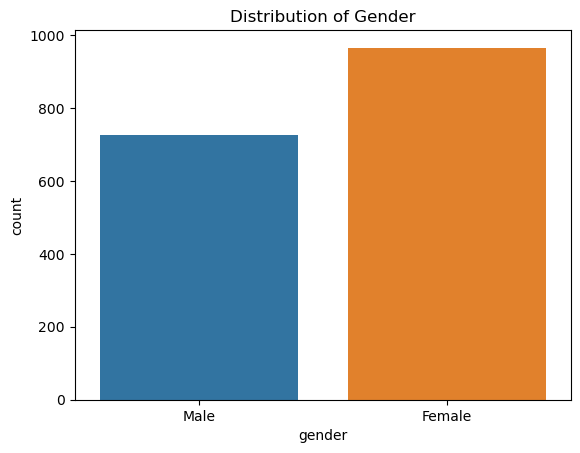

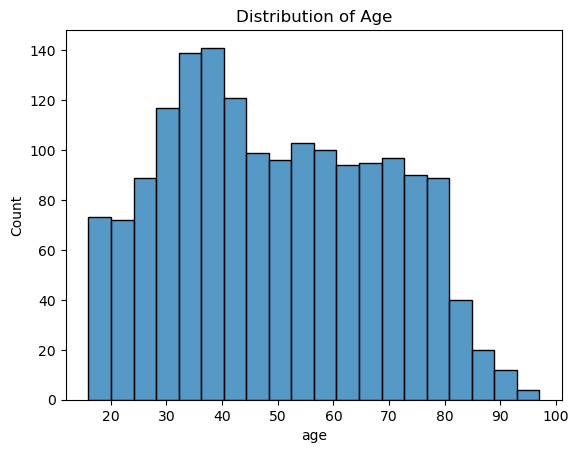

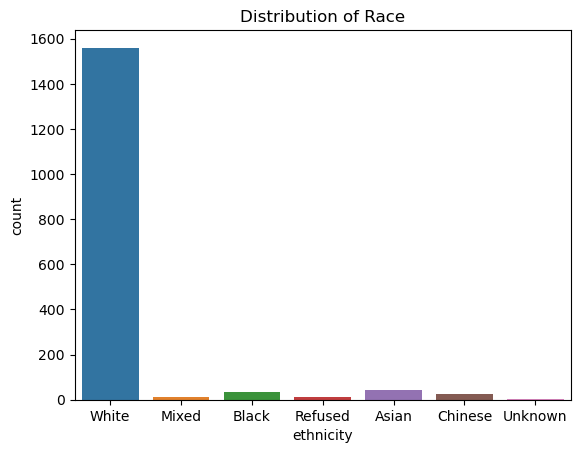

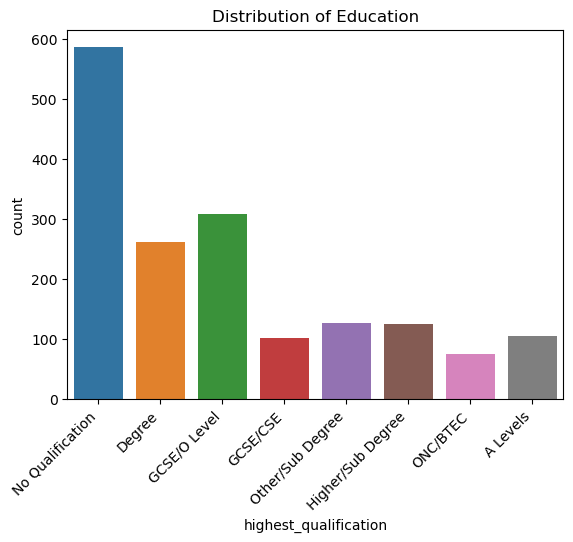

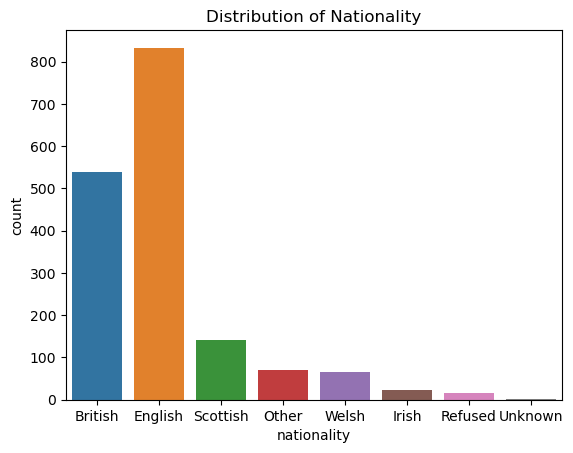

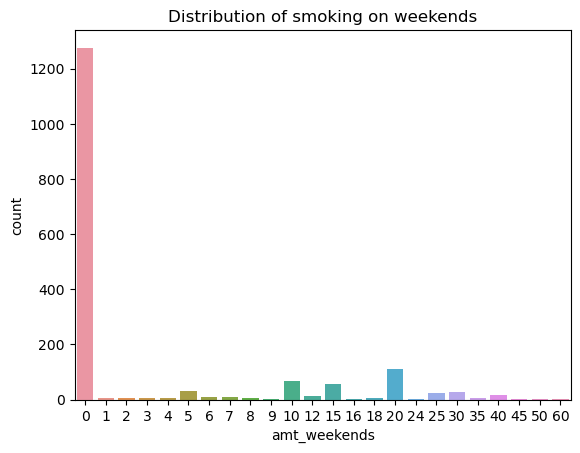

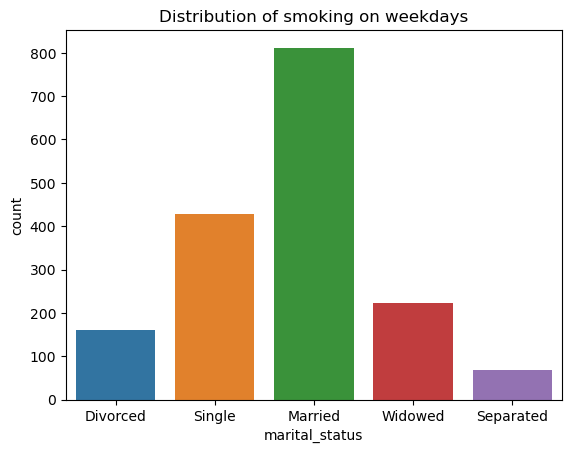

In [138]:
data= df
# Distribution of gender
sns.countplot(data=data, x='gender')
plt.title('Distribution of Gender')
plt.show()

# Distribution of age
sns.histplot(data=data, x='age', bins=20)
plt.title('Distribution of Age')
plt.show()

# Distribution of race
sns.countplot(data=data, x='ethnicity')
plt.title('Distribution of Race')
plt.show()

# Distribution of education
sns.countplot(data=data, x='highest_qualification')
plt.title('Distribution of Education')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution of country
sns.countplot(data=data, x='nationality')
plt.title('Distribution of Nationality')
plt.show()

# Distribution of nicotine dependence
sns.countplot(data=data, x='amt_weekends')
plt.title('Distribution of smoking on weekends')
plt.show()

# Distribution of smoking status
sns.countplot(data=data, x='marital_status')
plt.title('Distribution of smoking on weekdays')
plt.show()




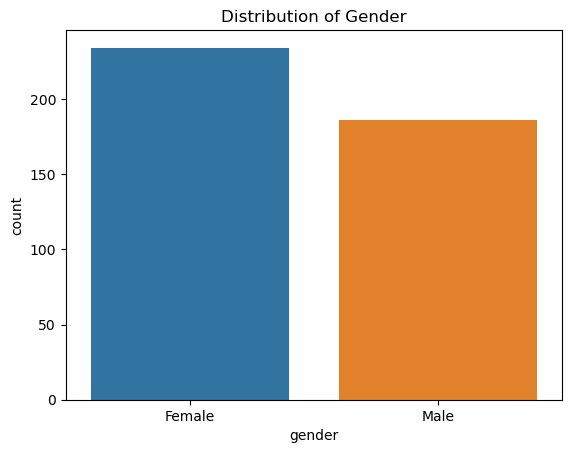

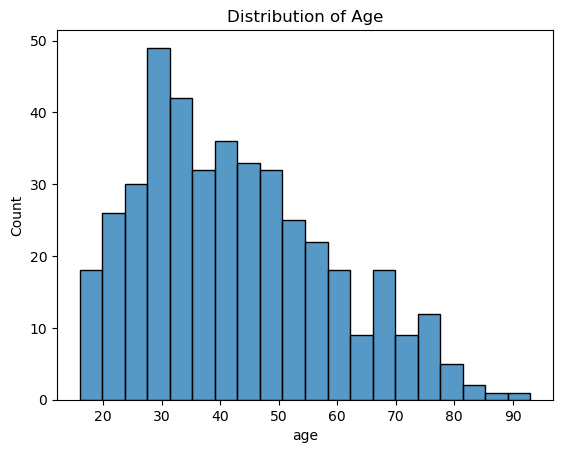

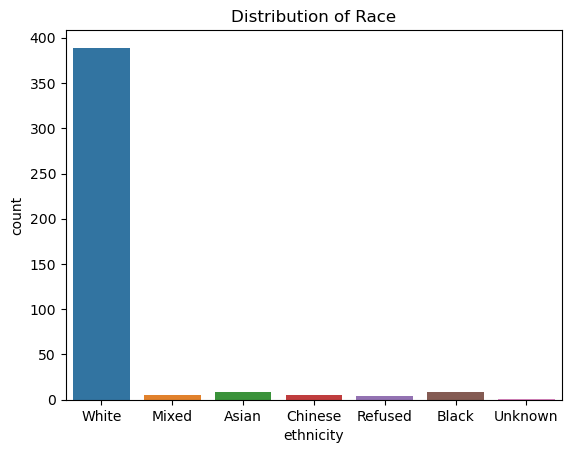

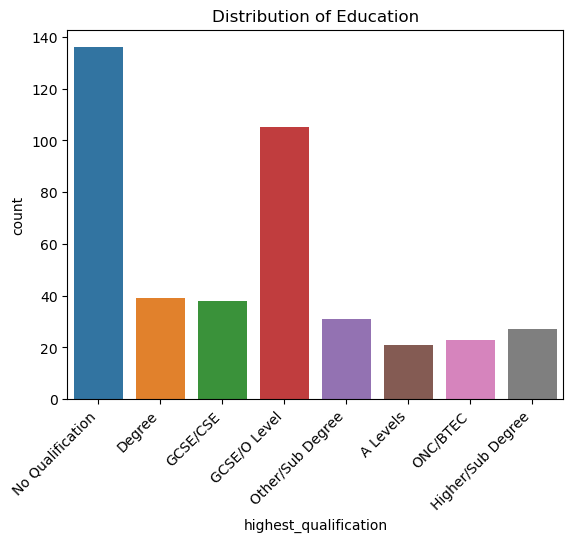

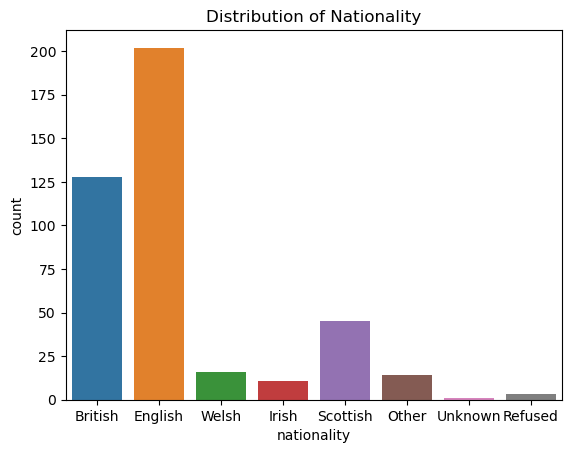

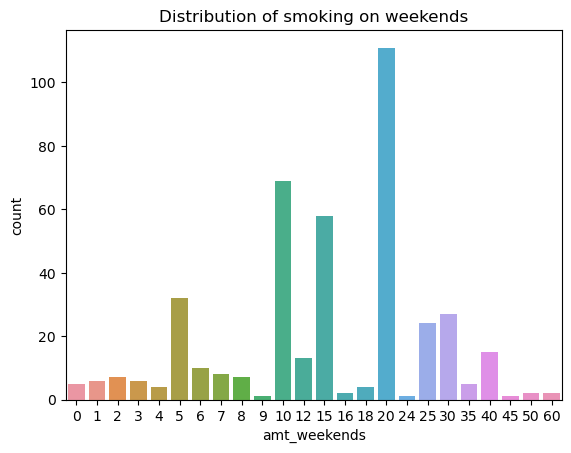

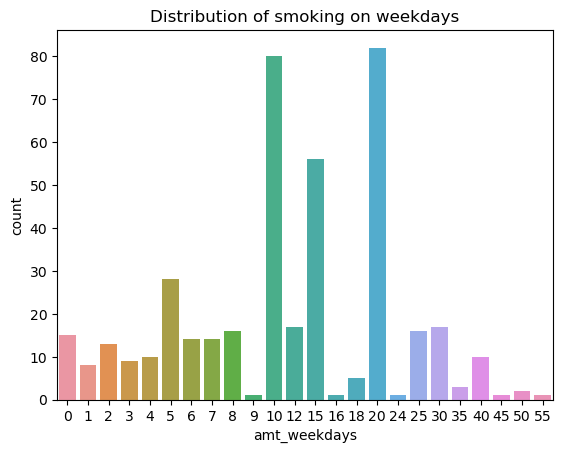

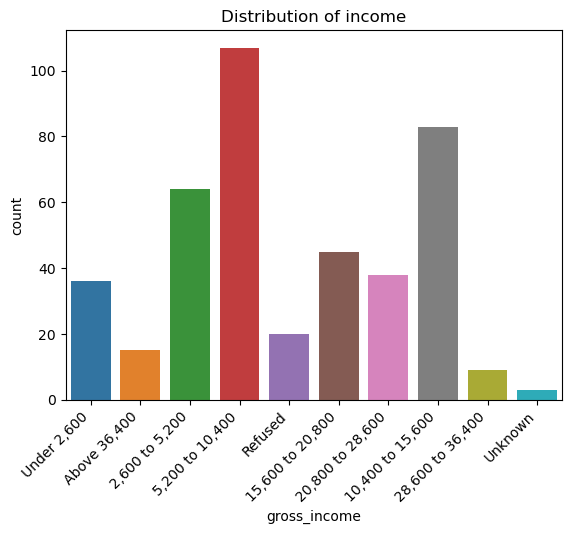

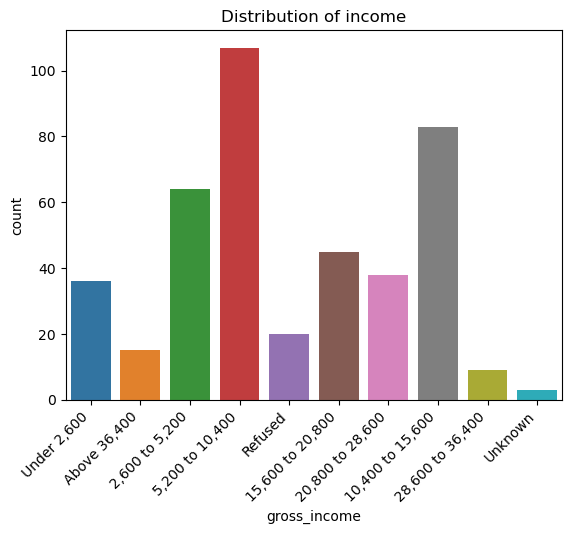

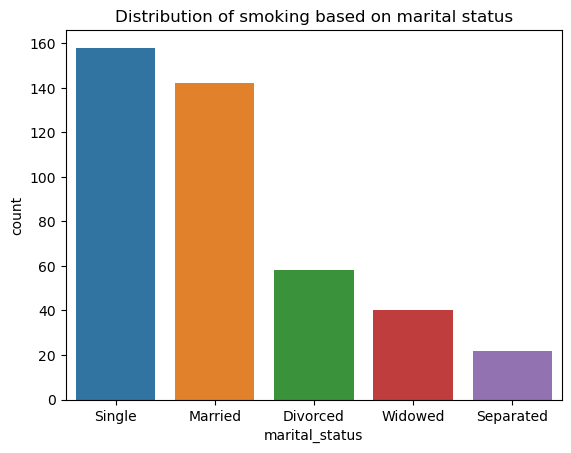

In [139]:
only_smokers = df[(df['amt_weekdays'] > 0) | (df['amt_weekends'] > 0)]

data = only_smokers

sns.countplot(data=data, x='gender')
plt.title('Distribution of Gender')
plt.show()

# Distribution of age
sns.histplot(data=data, x='age', bins=20)
plt.title('Distribution of Age')
plt.show()

# Distribution of race
sns.countplot(data=data, x='ethnicity')
plt.title('Distribution of Race')
plt.show()

# Distribution of education
sns.countplot(data=data, x='highest_qualification')
plt.title('Distribution of Education')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution of country
sns.countplot(data=data, x='nationality')
plt.title('Distribution of Nationality')
plt.show()

# Distribution of nicotine dependence
sns.countplot(data=data, x='amt_weekends')
plt.title('Distribution of smoking on weekends')
plt.show()

# Distribution of smoking status
sns.countplot(data=data, x='amt_weekdays')
plt.title('Distribution of smoking on weekdays')
plt.show()

sns.countplot(data=data,x='gross_income')
plt.title('Distribution of income')
plt.xticks(rotation=45, ha='right')
plt.show()

sns.countplot(data=data,x='gross_income')
plt.title('Distribution of income')
plt.xticks(rotation=45, ha='right')
plt.show()

sns.countplot(data=data, x='marital_status')
plt.title('Distribution of smoking based on marital status')
plt.show()

In [140]:
porcentage= (only_smokers.shape[0]/df.shape[0])*100
print(f"{porcentage:.2f}% do dataset é composto por fumantes")

24.84% do dataset é composto por fumantes


In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ids                    1691 non-null   int64 
 1   gender                 1691 non-null   object
 2   age                    1691 non-null   int64 
 3   marital_status         1691 non-null   object
 4   highest_qualification  1691 non-null   object
 5   nationality            1691 non-null   object
 6   ethnicity              1691 non-null   object
 7   gross_income           1691 non-null   object
 8   region                 1691 non-null   object
 9   smoke                  1691 non-null   object
 10  amt_weekends           1691 non-null   int64 
 11  amt_weekdays           1691 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 158.7+ KB


In [143]:
df.drop(columns=['ids','region','nationality'], inplace=True)

In [144]:
X = df.drop(['smoke'], axis=1)
y = df['smoke']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score*100,"%")


Accuracy: 98.23008849557522 %


In [145]:
# Get the feature importance (coefficients) of the model
importance = model.coef_[0]

# Print the feature importance scores
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.11205
Feature: 1, Score: 2.51222
Feature: 2, Score: 0.37709
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
